#### I used the wordcloud library. More info can be found at https://github.com/amueller/word_cloud.

In [1]:
# # uncomment to install wordcloud
# !conda install -y -c https://conda.anaconda.org/amueller wordcloud

In [2]:
# Adopted from https://github.com/amueller/word_cloud/blob/master/examples/colored_by_group.py

"""
Colored by Group Example
========================

Generating a word cloud that assigns colors to words based on
a predefined mapping from colors to words
"""

from wordcloud import (WordCloud, get_single_color_func)
import pandas as pd
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [3]:
df = pd.read_csv('../data/importance.csv', index_col='keyword')
df.head()

,importance,std,impact_coef,impact_direction
keyword,,,,
data,0.070086,0.019775,1.131870,positive
engineer,0.043681,0.019184,1.044775,positive
senior,0.040413,0.008232,1.519119,positive
analyst,0.035637,0.016312,-0.540957,negative
scientist,0.034766,0.017202,1.108205,positive


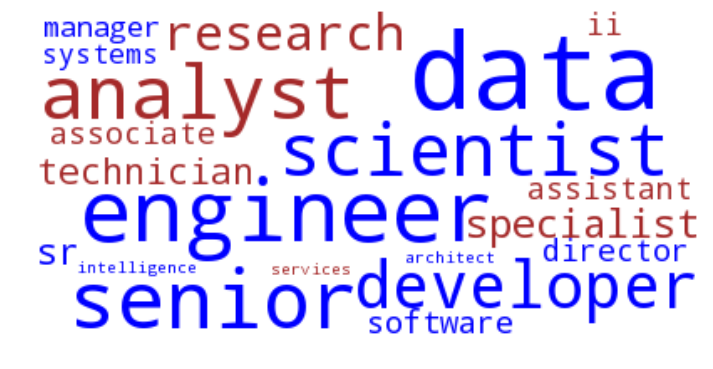

In [4]:
text = ''
for keyword in df.head(20).index:
    text += (str(keyword) + ' ') * int(df.importance[keyword] * 10000)
    
positives = [str(index) for index in df.head(20).index if df.impact_coef[index]>0]
negatives = [str(index) for index in df.head(20).index if df.impact_coef[index]<0]

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(background_color="white", collocations=False).generate(text.lower())

color_to_words = {'blue': positives, 'brown': negatives}

default_color = 'black'

# Create a color function with single tone
grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()